In [131]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random; random.seed(0)
import tensorflow as tf
% matplotlib inline

In [132]:
list_f = '/home/gengshay/code/monodepth/utils/filenames/eigen_train_files.txt'
base_dir = '/ssd0/KITTI/'
im_path_s = []; d_path_s = []
with open(list_f,'r') as f:
    lines = f.readlines(); random.shuffle(lines)
    for l in lines[:20]:
        im_path = l.split(' ')[0]
        d_path = im_path.replace('image_02/data', 'disp_0'); d_path = d_path.replace('.jpg', '.png') 
        im_path_s.append( '%s/%s'% (base_dir, im_path) ); d_path_s.append('%s/%s'% (base_dir, d_path))

In [133]:
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.visible_device_list='0'
config.gpu_options.allow_growth=True

# im_path = '/ssd0/KITTI/2011_09_26/2011_09_26_drive_0104_sync/image_02/data/0000000195.jpg'
# d_path = '/ssd0/KITTI/2011_09_26/2011_09_26_drive_0104_sync/depth_0/0000000195.png'

In [144]:
with tf.Session(config=config) as sess:
    for i in range(len(im_path_s)):
        print i
        print im_path_s[i]
        print d_path_s[i]
        im = tf.image.decode_jpeg(tf.read_file(im_path_s[i]))
        d = tf.image.decode_png(tf.read_file(d_path_s[i]))
        
        d = tf.subtract(tf.cast(d,tf.int32),1)
        mask = tf.cast(d >= 0, tf.int32)
        
        pred = tf.random_normal([376,1241,10],stddev=0.0001) + 1
        err = tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels = tf.one_hot(d,10))
        
        pure = tf.dynamic_partition(err, mask[:,:,0],2)[1]
        
        im = im.eval()
        d = d.eval()
        err = err.eval()
        pred = pred.eval()
        pure = pure.eval()
        
        dist = tf.contrib.distributions.Binomial(n=5., p=.5)
        dist = eval(dist)
        
        break 
        plt.figure(figsize=(20,10))

        
        show = cv2.addWeighted(d[:,:,0],10,im[:,:,0],0.05,0)
        plt.imshow(show)

0
/ssd0/KITTI//2011_10_03/2011_10_03_drive_0034_sync/image_02/data/0000001001.jpg
/ssd0/KITTI//2011_10_03/2011_10_03_drive_0034_sync/disp_0/0000001001.png


TypeError: eval() arg 1 must be a string or code object

In [135]:
d[-1][-1]

array([102], dtype=int32)

In [142]:
err

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [137]:
pred[-1][-1]

array([ 0.99999267,  1.00032628,  0.99991977,  0.99995458,  0.99990904,
        1.00001323,  1.00002778,  1.00015533,  0.99988019,  0.99994963], dtype=float32)

In [138]:
err.shape

(376, 1241)

In [139]:
pure

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

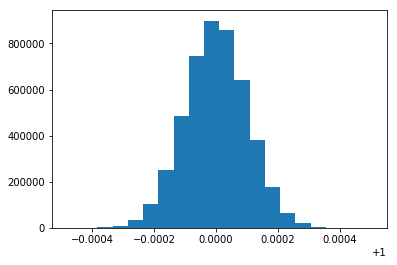

In [141]:
plt.hist(pred.flatten(),bins=20);

0
/ssd0/KITTI//2011_09_26/2011_09_26_drive_0087_sync/image_02/data/0000000441.jpg
/ssd0/KITTI//2011_09_26/2011_09_26_drive_0087_sync/depth_0/0000000441.png
1
/ssd0/KITTI//2011_09_30/2011_09_30_drive_0028_sync/image_02/data/0000002497.jpg
/ssd0/KITTI//2011_09_30/2011_09_30_drive_0028_sync/depth_0/0000002497.png
2
/ssd0/KITTI//2011_09_30/2011_09_30_drive_0034_sync/image_02/data/0000000079.jpg
/ssd0/KITTI//2011_09_30/2011_09_30_drive_0034_sync/depth_0/0000000079.png
3
/ssd0/KITTI//2011_09_30/2011_09_30_drive_0033_sync/image_02/data/0000000639.jpg
/ssd0/KITTI//2011_09_30/2011_09_30_drive_0033_sync/depth_0/0000000639.png
4
/ssd0/KITTI//2011_09_30/2011_09_30_drive_0020_sync/image_02/data/0000000612.jpg
/ssd0/KITTI//2011_09_30/2011_09_30_drive_0020_sync/depth_0/0000000612.png
5
/ssd0/KITTI//2011_09_29/2011_09_29_drive_0026_sync/image_02/data/0000000091.jpg
/ssd0/KITTI//2011_09_29/2011_09_29_drive_0026_sync/depth_0/0000000091.png
6
/ssd0/KITTI//2011_09_26/2011_09_26_drive_0022_sync/image_02/da

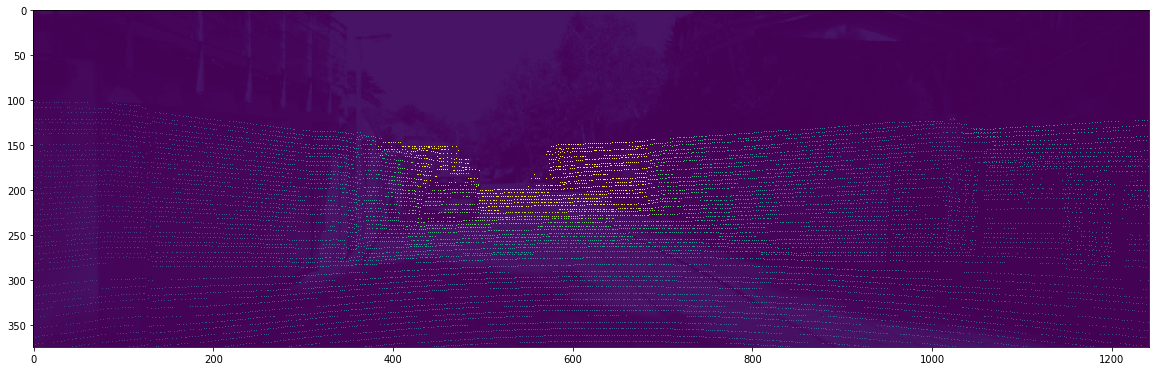

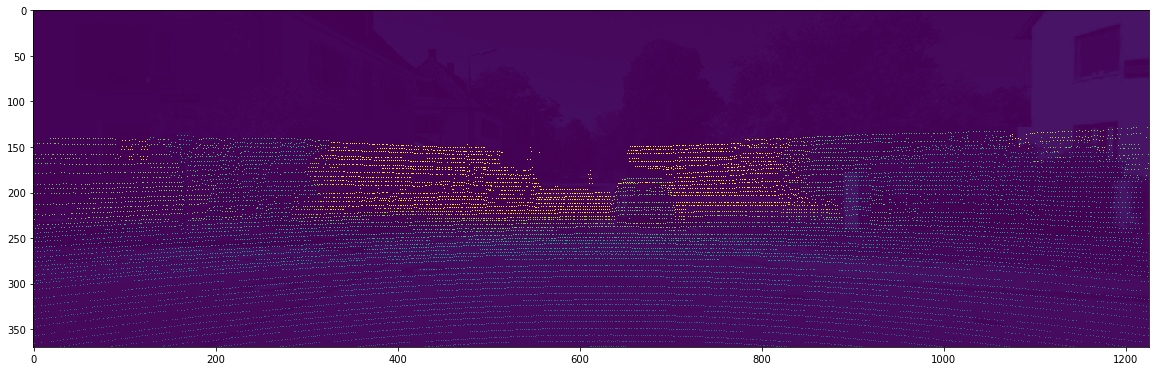

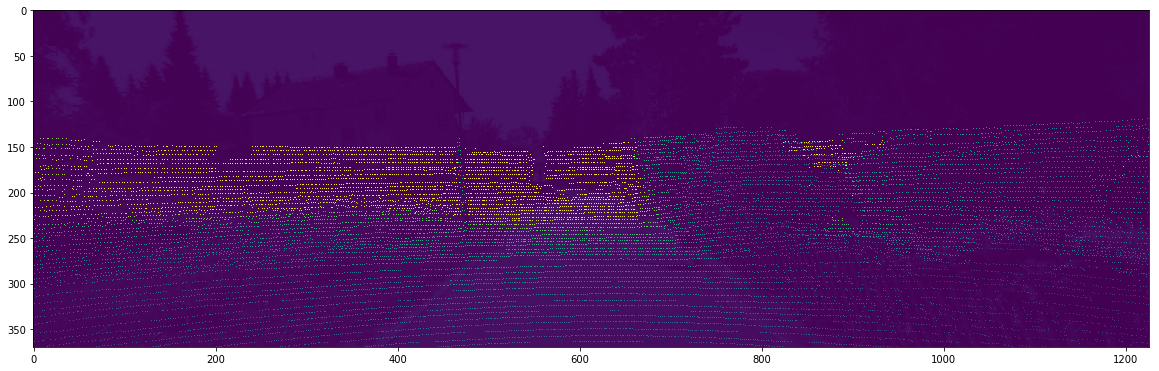

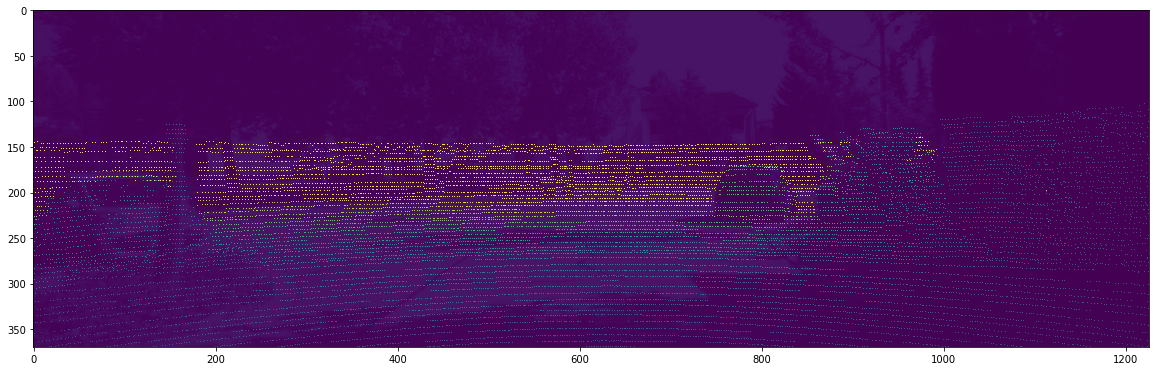

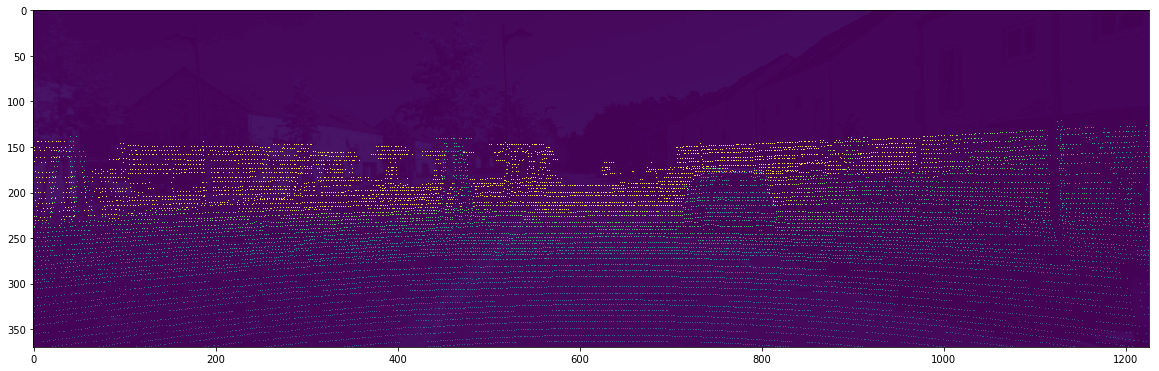

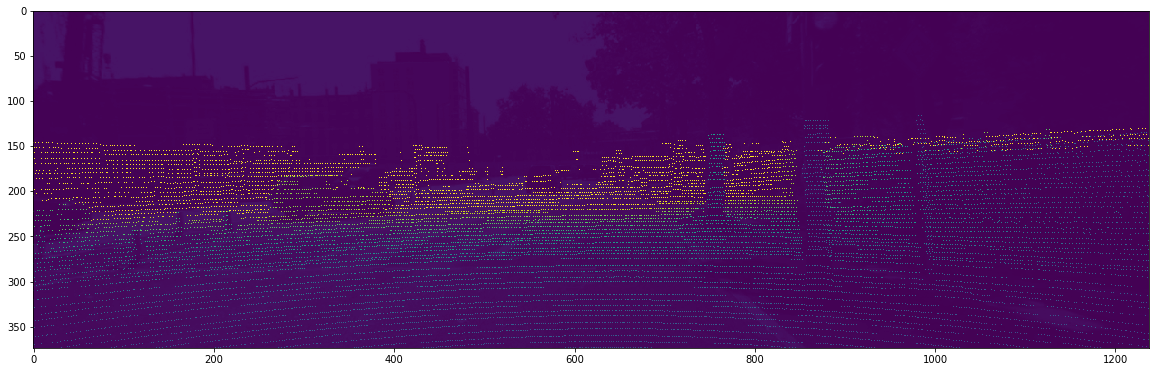

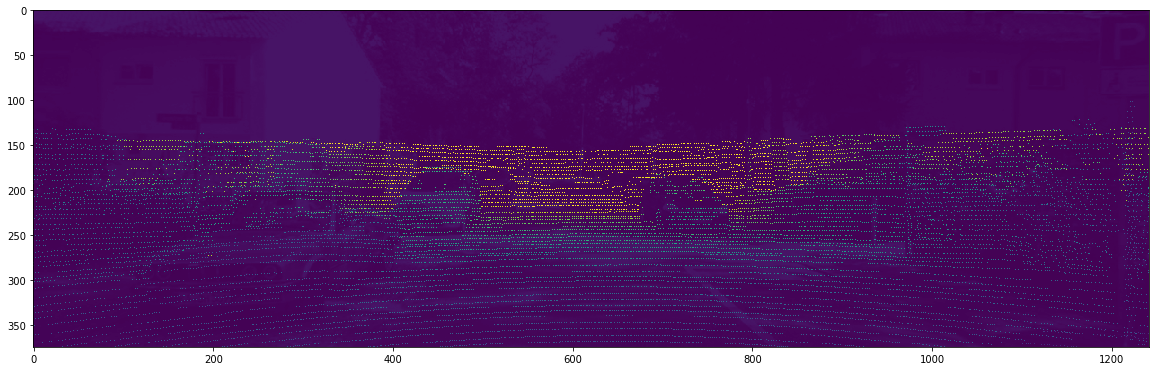

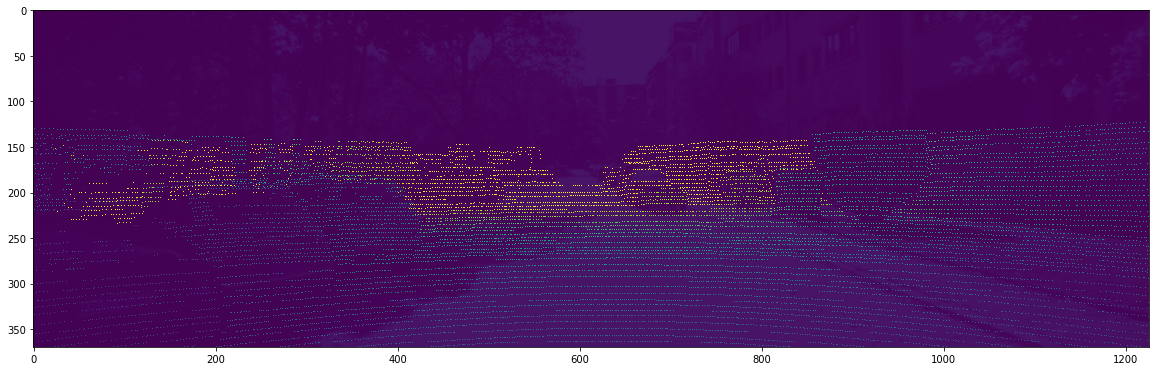

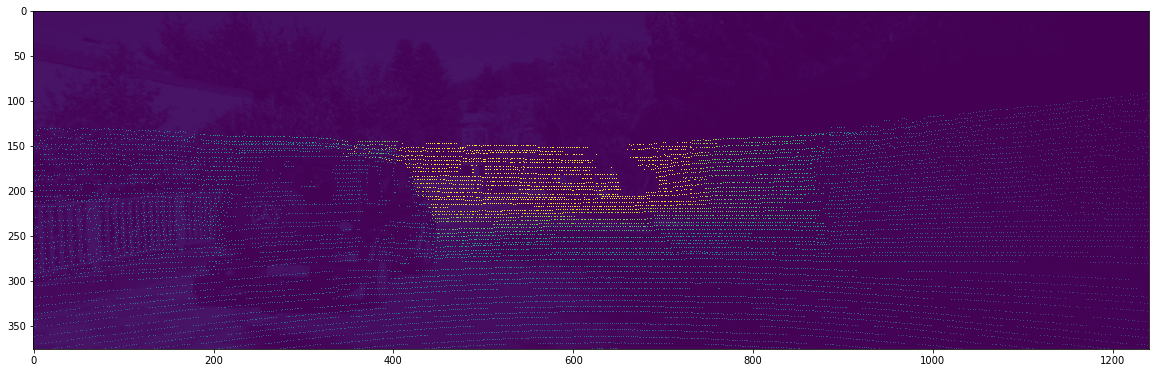

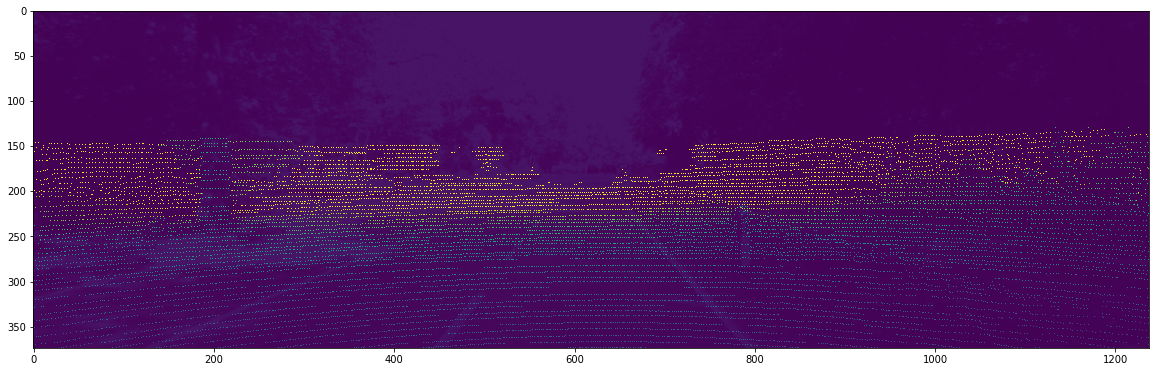

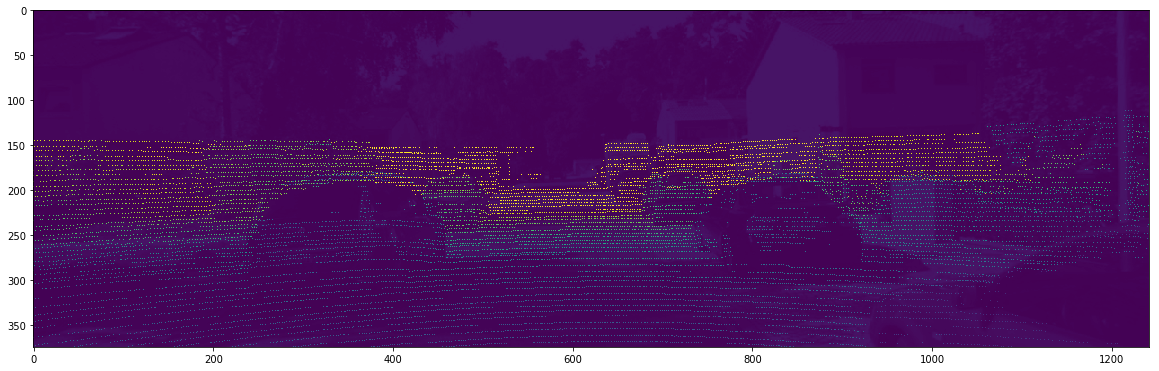

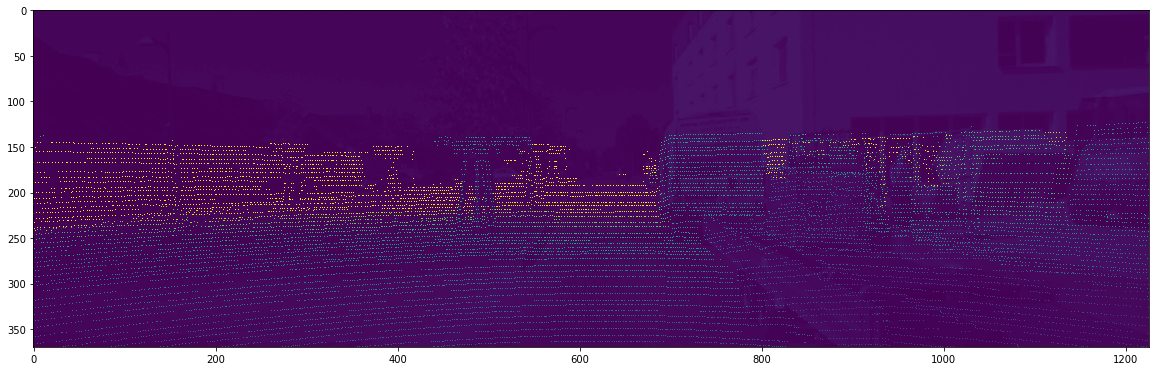

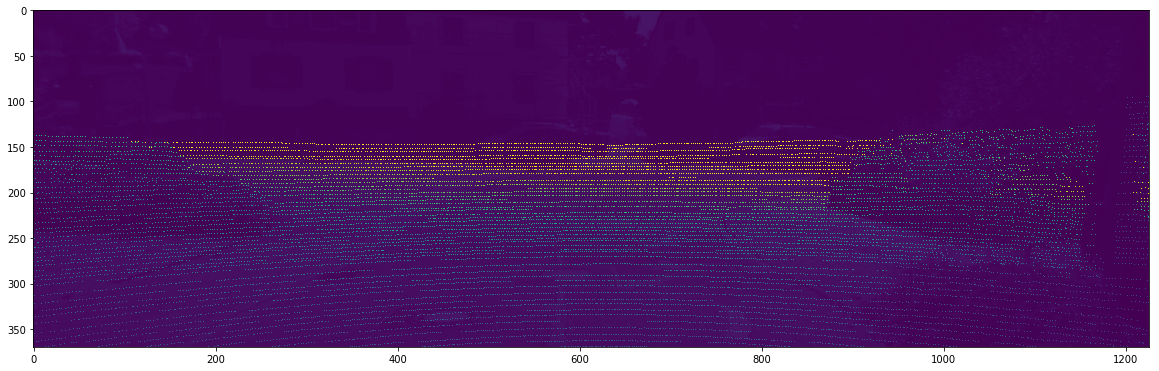

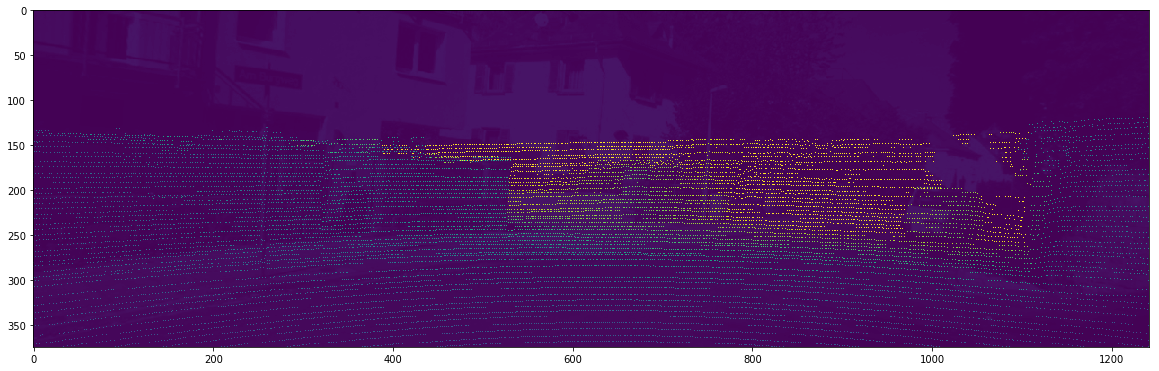

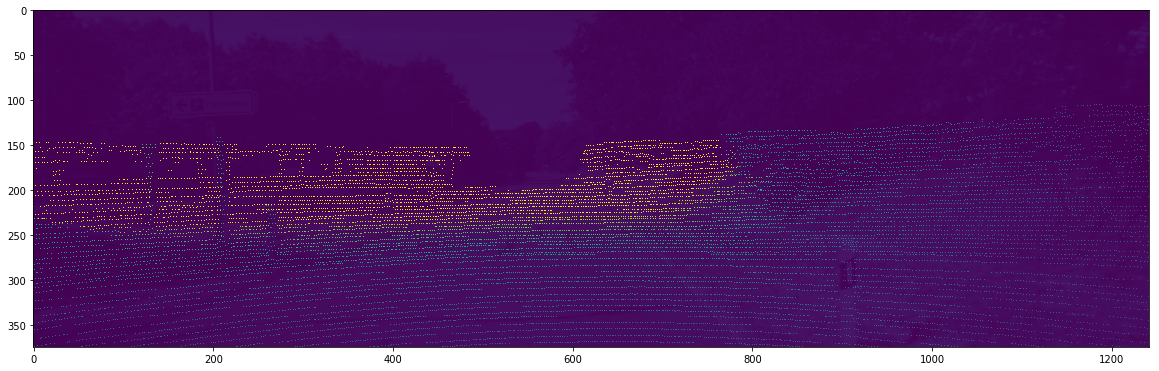

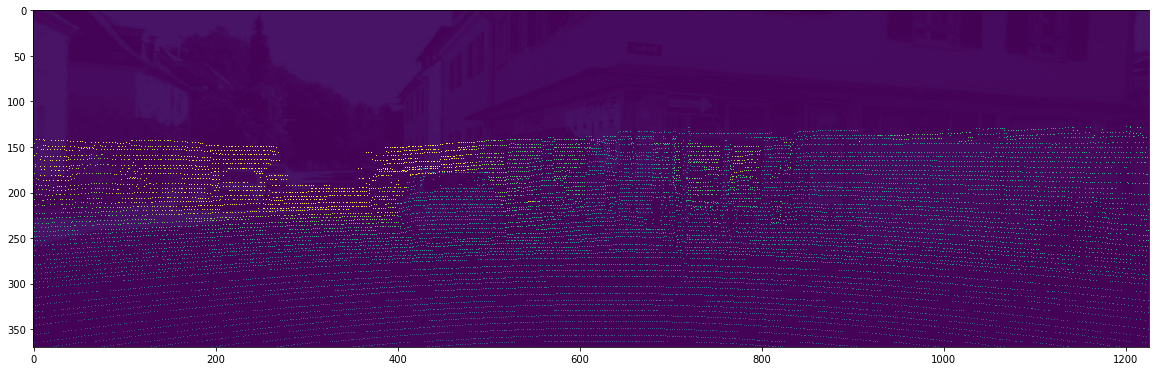

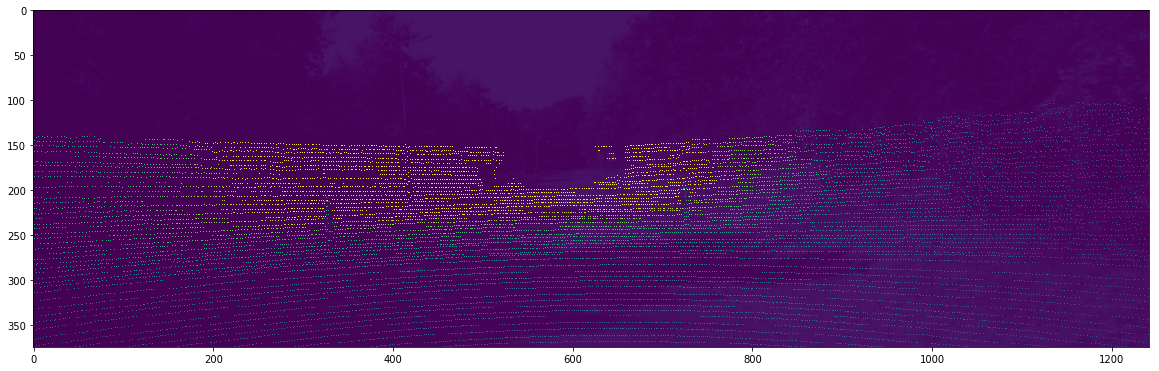

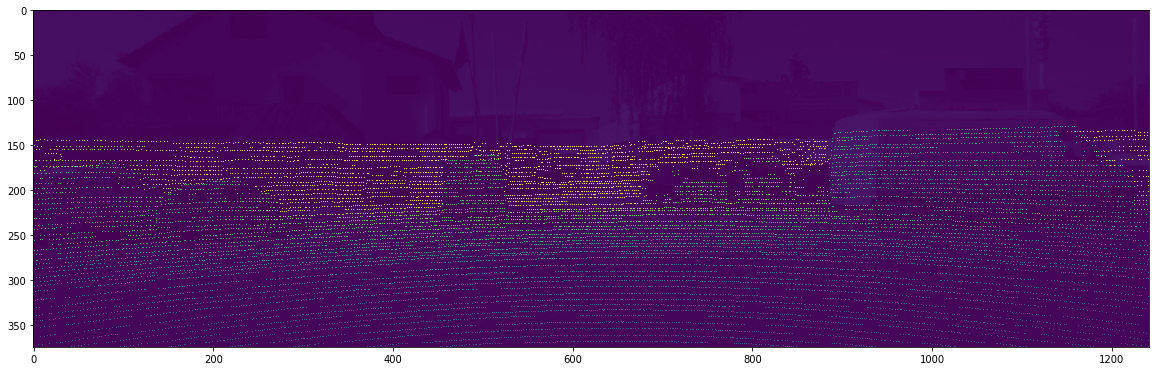

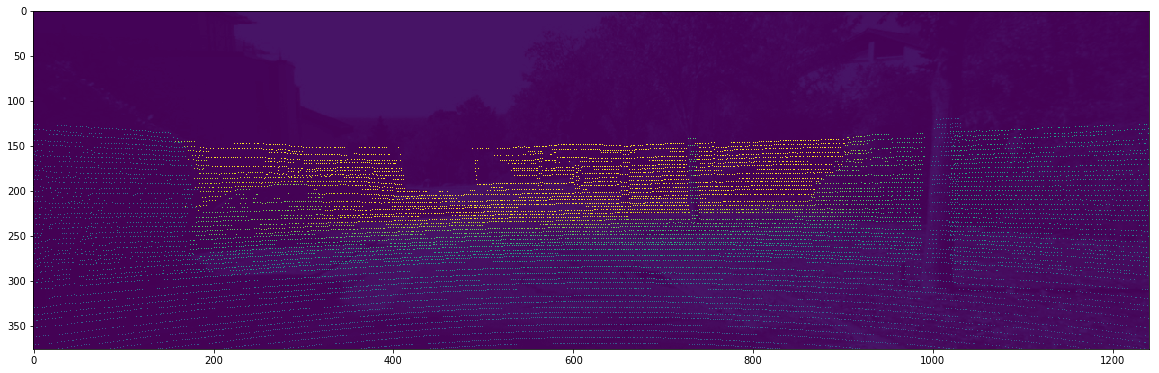

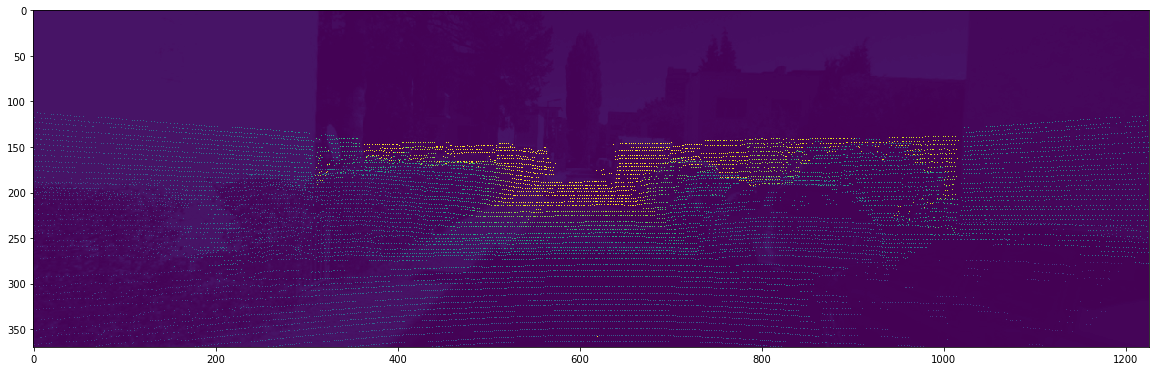

In [76]:
with tf.Session(config=config) as sess:
    for i in range(len(im_path_s)):
        print i
        print im_path_s[i]
        print d_path_s[i]
        im = tf.image.decode_jpeg(tf.read_file(im_path_s[i]))
        d = tf.image.decode_png(tf.read_file(d_path_s[i]))
        im = im.eval()
        d = d.eval()
        plt.figure(figsize=(20,10))
        show = cv2.addWeighted(d[:,:,0],10,im[:,:,0],0.05,0)
        plt.imshow(show)
    # d = tf.divide(tf.cast(d, tf.float32), tf.cast(tf.shape(d)[1],tf.float32))  # relative disp
    # d0 = tf.image.resize_images(d,  [256, 512], tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    # d1 = tf.image.resize_images(d0,  [128, 256], tf.image.ResizeMethod.BILINEAR)
    # d2 = tf.image.resize_images(d1,  [64, 128], tf.image.ResizeMethod.BILINEAR)
    # d3 = tf.image.resize_images(d2,  [32, 64], tf.image.ResizeMethod.BILINEAR)
    
    # e0 = d0 + tf.random_normal(tf.shape(d0),stddev=0.0001)
    
    # mask0 = tf.cast(d0>0,tf.float32)
    # d0_masked = mask0 * d0
    # e0_masked = mask0 * e0
    
    #d0_masked = tf.where(mask0, tf.log(d0), tf.zeros_like(d0))    
    #e0_masked = tf.where(mask0, tf.log(e0), tf.zeros_like(e0))
    
    # sup_loss = tf.abs(d0_masked-e0_masked)
    # sup_loss = tf.reduce_mean(sup_loss)
    
    
    
    '''
    
    d0 = d0.eval()
    d1 = d1.eval()
    d2 = d2.eval()
    d3 = d3.eval()
    e0 = e0.eval()
    mask0 = mask0.eval()
    
    d0_masked = d0_masked.eval()
    e0_masked = e0_masked.eval()
    sup_loss = sup_loss.eval()
    '''

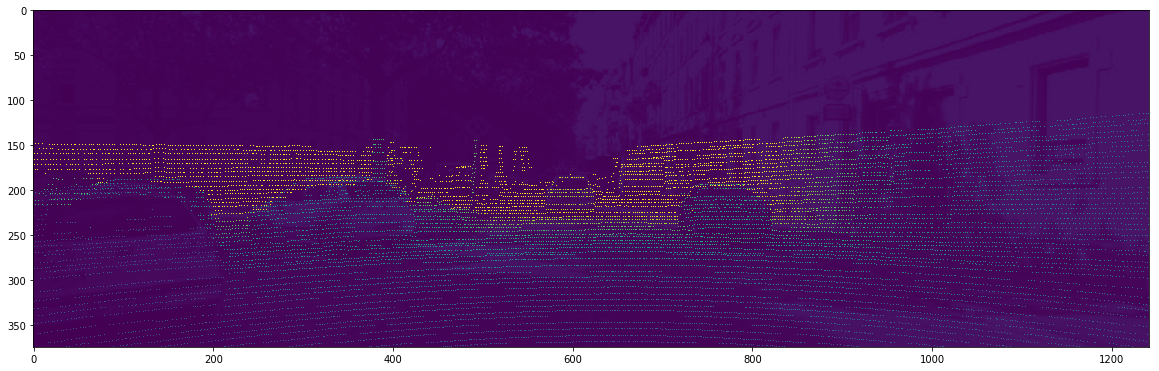

In [31]:
plt.figure(figsize=(20,10))
show = cv2.addWeighted(d[:,:,0],10,im[:,:,0],0.05,0)
plt.imshow(show)

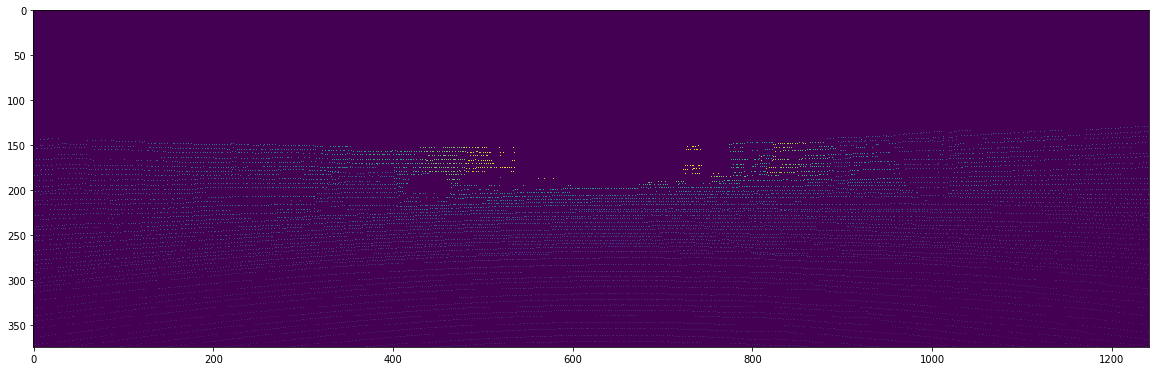

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(d[:,:,0])

16413


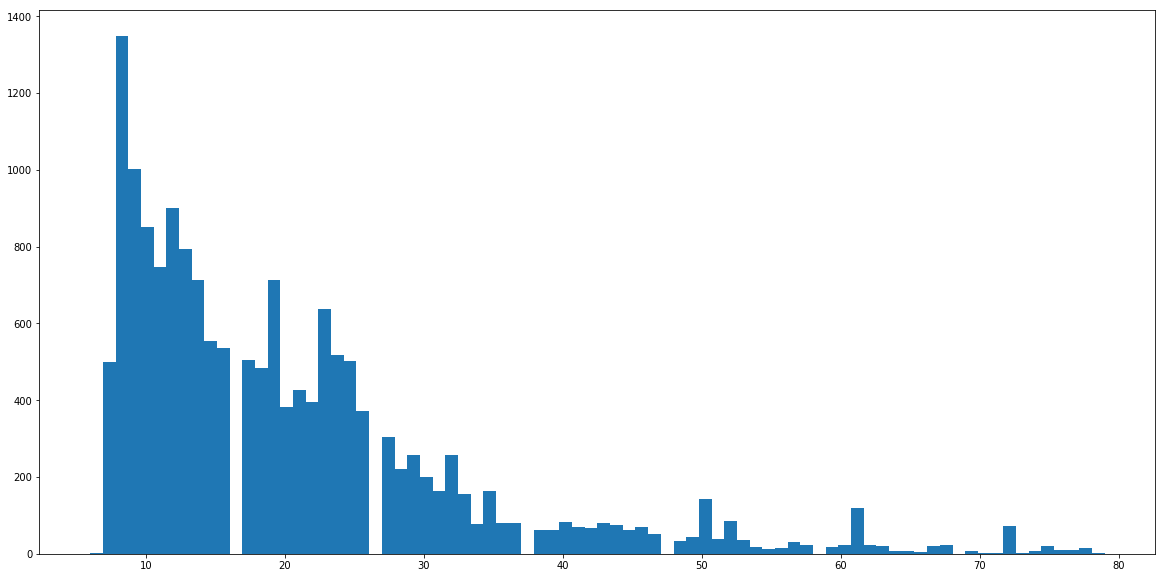

In [9]:
im = d
mask = (im > 0)
data = im[mask]
print np.sum(mask)
plt.figure(figsize=(20,10))
plt.hist(data.flatten(),bins=80);

16473


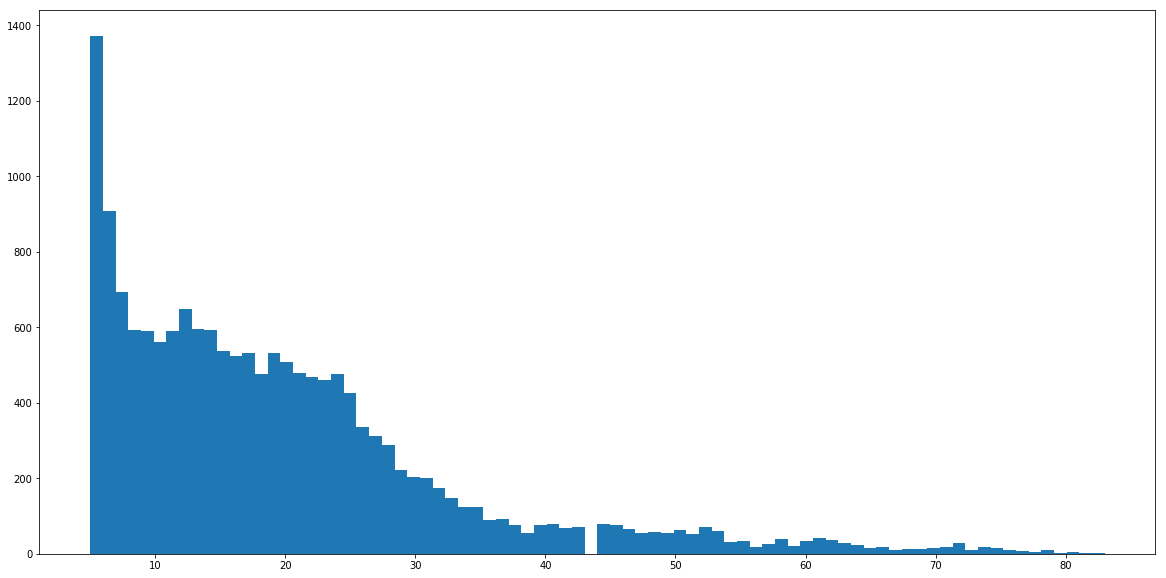

In [33]:
im = d
mask = (im > 4)
data = im[mask]
print np.sum(mask)
plt.figure(figsize=(20,10))
plt.hist(data.flatten(),bins=80);

In [26]:
data

array([1, 1, 1, ..., 1, 5, 5], dtype=uint8)

In [12]:
np.sum(sup_loss)

1.2678825e-05

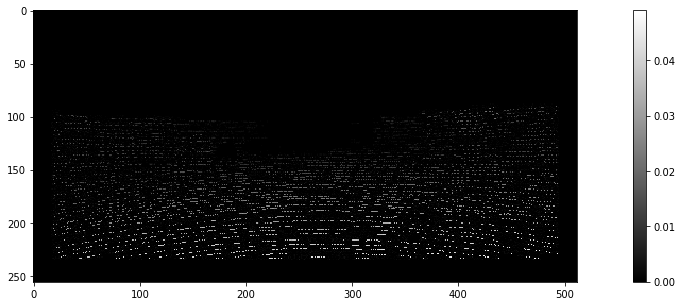

In [15]:
fig = plt.figure(figsize = (20,5))
plt.imshow(d0_masked[:,:,0],cmap='gray')
plt.colorbar()

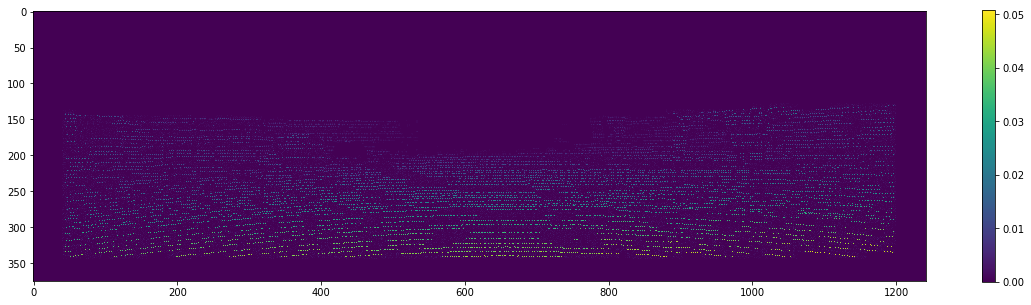

In [18]:
fig = plt.figure(figsize = (20,5))
plt.imshow(d[:,:,0])
plt.colorbar()

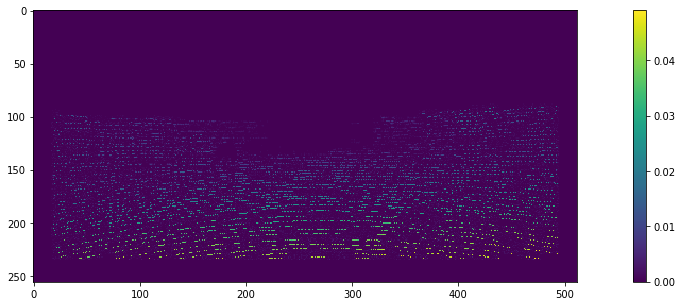

In [19]:
fig = plt.figure(figsize = (20,5))
plt.imshow(d0[:,:,0])
plt.colorbar()

In [20]:
print '%f,%f,%f,%f' % (np.max(d0),np.max(d1),np.max(d2),np.max(d3))

0.049114,0.047504,0.046699,0.044283


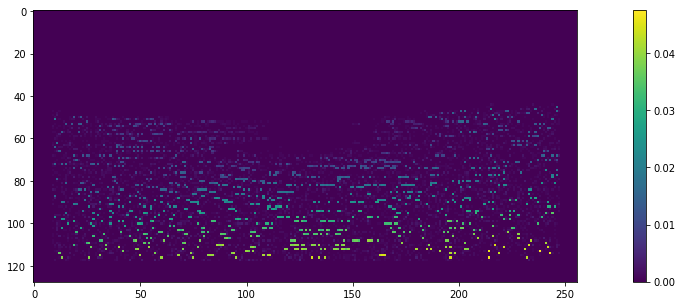

In [21]:
fig = plt.figure(figsize = (20,5))
plt.imshow(d1[:,:,0])
plt.colorbar()

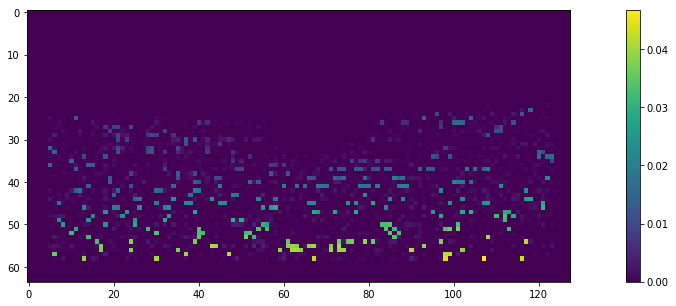

In [22]:
fig = plt.figure(figsize = (20,5))
plt.imshow(d2[:,:,0])
plt.colorbar()

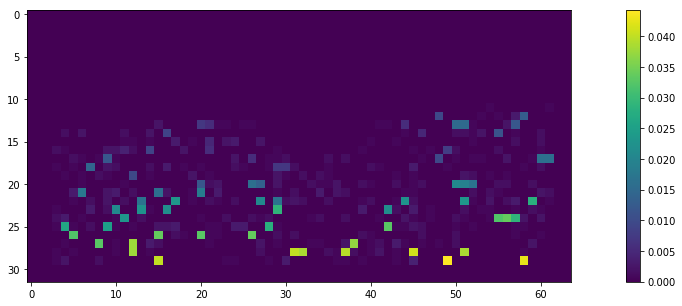

In [23]:
fig = plt.figure(figsize = (20,5))
plt.imshow(d3[:,:,0])
plt.colorbar()

20742


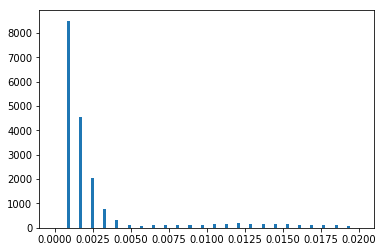

In [98]:
plt.hist(d0[d0>0].flatten(),bins=100,range=(0,0.02));
print np.sum(d0>0)

5220

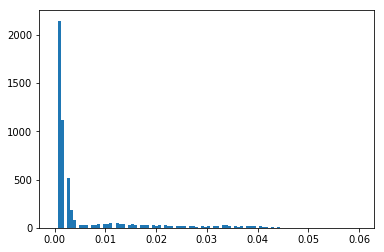

In [93]:
plt.hist(d1[d1>0].flatten(),bins=100,range=(0,0.06));
np.sum(d1>0)

1290

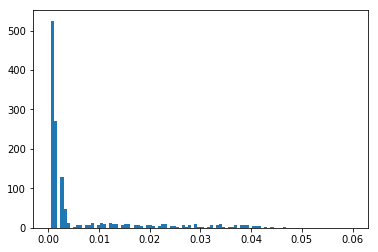

In [94]:
plt.hist(d2[d2>0].flatten(),bins=100,range=(0,0.06));
np.sum(d2>0)

342

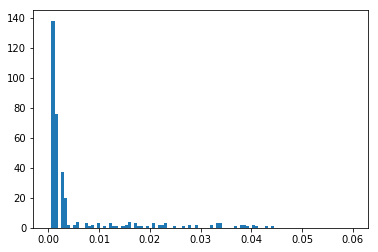

In [96]:
plt.hist(d3[d3>0].flatten(),bins=100,range=(0,0.06));
np.sum(d3>0)

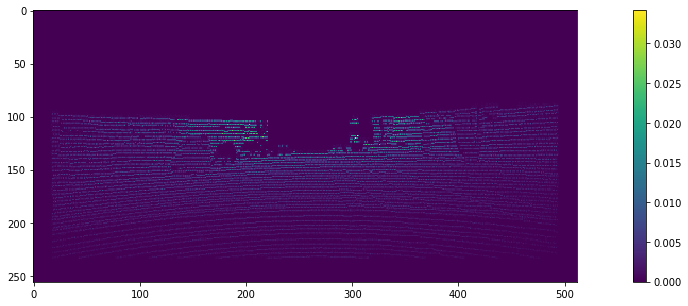

In [24]:
fig = plt.figure(figsize = (20,5))
plt.imshow(d[:,:,0])
plt.colorbar()